<a href="https://colab.research.google.com/github/JoseIng-EO/challenge2-data-science-telecom-x/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

## Paso N° 1: Importación de la biblioteca pandas

In [3]:
import pandas as pd

## Paso N° 2: Leer archivo json

In [4]:
df_telecomx = pd.read_json('TelecomX_Data.json')
df_telecomx

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [5]:
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
df_telecomx.shape

(7267, 6)

#🔧 Transformación

# Paso N° 1: Normalizando archivos JSON, extracción de datos del diccionario.

In [7]:
# Extracción de las columnas de característivas de diccionario
df_customer = pd.json_normalize(df_telecomx['customer'])
df_phone = pd.json_normalize(df_telecomx['phone'])
df_internet = pd.json_normalize(df_telecomx['internet'])
df_account = pd.json_normalize(df_telecomx['account'])

In [8]:
# Eliminar columnas anidadas
df_telecomx.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

# Cocatenar dataframe original con los nuevos datos de la tabla
df_telecomx = pd.concat([df_telecomx, df_customer, df_phone, df_internet, df_account], axis=1)
df_telecomx.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Paso N°2: Renombrar columnas para una mejor visualización de los datos

In [9]:
df_telecomx.rename(columns={
    'customerID': 'ID',
    'Churn': 'abandono_servicio',
    'gender': 'genero',
    'SeniorCitizen': 'ciudadano_senior',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependientes',
    'tenure': 'meses_en_empresa',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_online',
    'DeviceProtection': 'proteccion_dispositivos',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'facturas_electronicas',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargos_mensuales',
    'Charges.Total': 'cargos_totales'
}, inplace=True)

In [10]:
df_telecomx.head()

,ID,abandono_servicio,genero,ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,respaldo_online,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,facturas_electronicas,metodo_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Paso N° 3: Detectar valores null

In [11]:
df_telecomx.isnull().sum()

,0
ID,0
abandono_servicio,0
genero,0
ciudadano_senior,0
tiene_pareja,0
tiene_dependientes,0
meses_en_empresa,0
servicio_telefonico,0
lineas_multiples,0
tipo_internet,0


# Paso N°4: Detectar string vacios

In [12]:
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7267 non-null   object 
 1   abandono_servicio        7267 non-null   object 
 2   genero                   7267 non-null   object 
 3   ciudadano_senior         7267 non-null   int64  
 4   tiene_pareja             7267 non-null   object 
 5   tiene_dependientes       7267 non-null   object 
 6   meses_en_empresa         7267 non-null   int64  
 7   servicio_telefonico      7267 non-null   object 
 8   lineas_multiples         7267 non-null   object 
 9   tipo_internet            7267 non-null   object 
 10  seguridad_online         7267 non-null   object 
 11  respaldo_online          7267 non-null   object 
 12  proteccion_dispositivos  7267 non-null   object 
 13  soporte_tecnico          7267 non-null   object 
 14  tv_streaming            

# Pao N° 5: Detectar string vacíos

In [13]:
(df_telecomx['abandono_servicio'] == '').sum()

np.int64(224)

In [14]:
(df_telecomx['cargos_totales'] == ' ').sum()

np.int64(11)

# Paso N° 6: Reemplazar valores vacios por nan

In [15]:
# importar biblioteca numpy
import numpy as np

In [16]:
# Reemplazar string vacios por nan
df_telecomx['abandono_servicio'] = df_telecomx['abandono_servicio'].replace('', np.nan)
df_telecomx['cargos_totales'] = df_telecomx['cargos_totales'].replace(' ', np.nan)


In [17]:
(df_telecomx['abandono_servicio'] == '').sum()

np.int64(0)

In [18]:
(df_telecomx['cargos_totales'] == ' ').sum()

np.int64(0)

In [19]:
df_telecomx.isnull().sum()

,0
ID,0
abandono_servicio,224
genero,0
ciudadano_senior,0
tiene_pareja,0
tiene_dependientes,0
meses_en_empresa,0
servicio_telefonico,0
lineas_multiples,0
tipo_internet,0


# Paso N° 7: Eliminar las filas nan

In [20]:
df_telecomx = df_telecomx.dropna(subset=['abandono_servicio', 'cargos_totales'])
df_telecomx[['abandono_servicio', 'cargos_totales']].isnull().sum()

,0
abandono_servicio,0
cargos_totales,0


In [21]:
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7032 non-null   object 
 1   abandono_servicio        7032 non-null   object 
 2   genero                   7032 non-null   object 
 3   ciudadano_senior         7032 non-null   int64  
 4   tiene_pareja             7032 non-null   object 
 5   tiene_dependientes       7032 non-null   object 
 6   meses_en_empresa         7032 non-null   int64  
 7   servicio_telefonico      7032 non-null   object 
 8   lineas_multiples         7032 non-null   object 
 9   tipo_internet            7032 non-null   object 
 10  seguridad_online         7032 non-null   object 
 11  respaldo_online          7032 non-null   object 
 12  proteccion_dispositivos  7032 non-null   object 
 13  soporte_tecnico          7032 non-null   object 
 14  tv_streaming             7032

# Paso N° 8: Cambiar los tipos de datos

In [52]:
# Object a float
df_telecomx['cargos_totales'] = df_telecomx['cargos_totales'].astype(np.float64)

# Object a string
df_telecomx['ID'] = df_telecomx['ID'].astype(str)
df_telecomx['genero'] = df_telecomx['genero'].astype(str)
df_telecomx['servicio_telefonico'] = df_telecomx['servicio_telefonico'].astype(str)
df_telecomx['tipo_internet'] = df_telecomx['tipo_internet'].astype(str)
df_telecomx['metodo_pago'] = df_telecomx['metodo_pago'].astype(str)

# Object a booleanos
datos_bool = ['abandono_servicio', 'ciudadano_senior', 'tiene_pareja', 'tiene_dependientes', 'facturas_electronicas']
df_telecomx[datos_bool] = df_telecomx[datos_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)

# Object a categóricas
columnas_categoricas = ['lineas_multiples', 'seguridad_online', 'respaldo_online', 'proteccion_dispositivos', 'soporte_tecnico', 'tv_streaming', 'peliculas_streaming']
df_telecomx[columnas_categoricas] = df_telecomx[columnas_categoricas].astype('category')
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       7032 non-null   object  
 1   abandono_servicio        7032 non-null   int64   
 2   genero                   7032 non-null   object  
 3   ciudadano_senior         7032 non-null   int64   
 4   tiene_pareja             7032 non-null   int64   
 5   tiene_dependientes       7032 non-null   int64   
 6   meses_en_empresa         7032 non-null   int64   
 7   servicio_telefonico      7032 non-null   object  
 8   lineas_multiples         7032 non-null   category
 9   tipo_internet            7032 non-null   object  
 10  seguridad_online         7032 non-null   category
 11  respaldo_online          7032 non-null   category
 12  proteccion_dispositivos  7032 non-null   category
 13  soporte_tecnico          7032 non-null   category
 14  tv_streaming 

In [23]:
df_telecomx.head()

,ID,abandono_servicio,genero,ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,respaldo_online,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,facturas_electronicas,metodo_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


In [24]:
# Verificar valores duplicados
df_telecomx.duplicated().sum()

np.int64(0)

# Paso N° 9: Crear columna cuentas diarias en función de cargos mensuales

In [25]:
df_telecomx['cuentas_diarias'] = df_telecomx['cargos_mensuales'].astype(float) / 30
df_telecomx.head()

,ID,abandono_servicio,genero,ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,facturas_electronicas,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667


# Paso N° 15: Estandarización y transformación de datos

In [26]:
df_telecomx[datos_bool] = df_telecomx[datos_bool].astype(int)
df_telecomx[datos_bool].head()

,abandono_servicio,ciudadano_senior,tiene_pareja,tiene_dependientes,facturas_electronicas
0,0,0,1,1,1
1,0,0,0,0,0
2,1,0,0,0,1
3,1,1,1,0,1
4,1,1,1,0,1


In [27]:
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       7032 non-null   object  
 1   abandono_servicio        7032 non-null   int64   
 2   genero                   7032 non-null   object  
 3   ciudadano_senior         7032 non-null   int64   
 4   tiene_pareja             7032 non-null   int64   
 5   tiene_dependientes       7032 non-null   int64   
 6   meses_en_empresa         7032 non-null   int64   
 7   servicio_telefonico      7032 non-null   object  
 8   lineas_multiples         7032 non-null   category
 9   tipo_internet            7032 non-null   object  
 10  seguridad_online         7032 non-null   category
 11  respaldo_online          7032 non-null   category
 12  proteccion_dispositivos  7032 non-null   category
 13  soporte_tecnico          7032 non-null   category
 14  tv_streaming 

#📊 Carga y análisis

# 1. Análisis descriptivo: Valores estadísticos

In [28]:
df_telecomx.describe()

,abandono_servicio,ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,facturas_electronicas,cargos_mensuales,cargos_totales,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


# 2. Recuento de abandono de servicios

In [29]:
# Variables categóricas
columnas_categoricas = df_telecomx.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
columnas_categoricas

['ID',
 'genero',
 'servicio_telefonico',
 'lineas_multiples',
 'tipo_internet',
 'seguridad_online',
 'respaldo_online',
 'proteccion_dispositivos',
 'soporte_tecnico',
 'tv_streaming',
 'peliculas_streaming',
 'tipo_contrato',
 'metodo_pago']

In [30]:
# Recuento cruzado con items abandono de servicio
for recuento in columnas_categoricas:
  print(f'\n*** Porcentaje de evasión por {recuento} ***')
  porcentaje = pd.crosstab(index=df_telecomx[recuento], columns=df_telecomx['abandono_servicio'], normalize='index')*100
  print(porcentaje,round(2))


*** Porcentaje de evasión por ID ***
abandono_servicio      0      1
ID                             
0002-ORFBO         100.0    0.0
0003-MKNFE         100.0    0.0
0004-TLHLJ           0.0  100.0
0011-IGKFF           0.0  100.0
0013-EXCHZ           0.0  100.0
...                  ...    ...
9987-LUTYD         100.0    0.0
9992-RRAMN           0.0  100.0
9992-UJOEL         100.0    0.0
9993-LHIEB         100.0    0.0
9995-HOTOH         100.0    0.0

[7032 rows x 2 columns] 2

*** Porcentaje de evasión por genero ***
abandono_servicio          0          1
genero                                 
Female             73.040482  26.959518
Male               73.795435  26.204565 2

*** Porcentaje de evasión por servicio_telefonico ***
abandono_servicio            0          1
servicio_telefonico                      
No                   75.000000  25.000000
Yes                  73.252519  26.747481 2

*** Porcentaje de evasión por lineas_multiples ***
abandono_servicio          0          

# 3. DISTRIBUCIÓN POR EVASIÓN

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
abandono_servicio_count = df_telecomx['abandono_servicio'].value_counts()
abandono_servicio_count

,count
abandono_servicio,
0,5163
1,1869


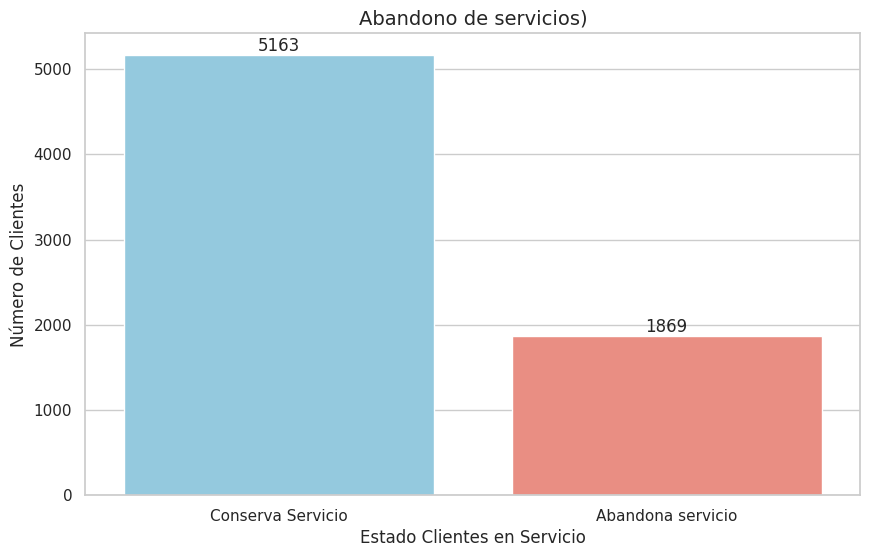

In [47]:
# Estilo de gráfica
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=abandono_servicio_count.index, y=abandono_servicio_count.values, hue=abandono_servicio_count.index,palette=["skyblue", "salmon"],legend=False)

# Títulos y ejes
plt.title('Abandono de servicios)', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xlabel('Estado Clientes en Servicio', fontsize=12)
plt.xticks([0, 1], ['Conserva Servicio', 'Abandona servicio'])

# Leyenda en barras
for i, count in enumerate(abandono_servicio_count.values):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)

plt.show()

# 4. RECUENTO DE EVASIÓN

## 4.1. Abandono de Servicios por Variables Categóricas

In [42]:
# Variables por género
hombres = df_telecomx[df_telecomx['genero'] == 'Male']['abandono_servicio'].value_counts()
mujeres = df_telecomx[df_telecomx['genero'] == 'Female']['abandono_servicio'].value_counts()

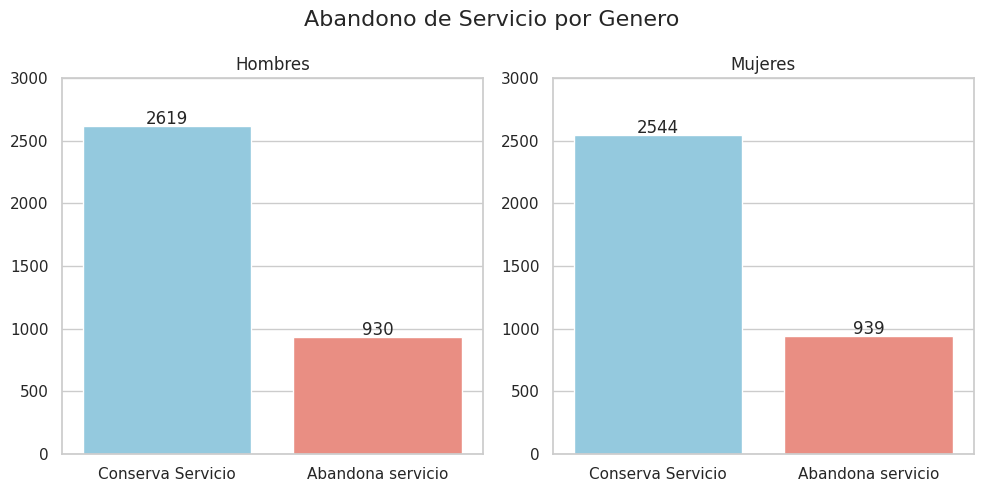

In [46]:
sns.set(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Abandono de Servicio por Genero', fontsize=16)

def plot_abandono(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["skyblue", "salmon"],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Conserva Servicio', 'Abandona servicio'])
    ax.set_ylim(0, 3000)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_abandono(hombres, ax1, 'Hombres')
plot_abandono(mujeres, ax2, 'Mujeres')

plt.tight_layout()
plt.show()

## 4.2. ABANDONO DE SERVICIOS POR TIPO DE CONTRATO

In [48]:
df_telecomx['tipo_contrato'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [50]:
agno = df_telecomx[df_telecomx['tipo_contrato'] == 'One year']['abandono_servicio'].value_counts()
mes = df_telecomx[df_telecomx['tipo_contrato'] == 'Month-to-month']['abandono_servicio'].value_counts()
agnos_2= df_telecomx[df_telecomx['tipo_contrato'] == 'Two year']['abandono_servicio'].value_counts()

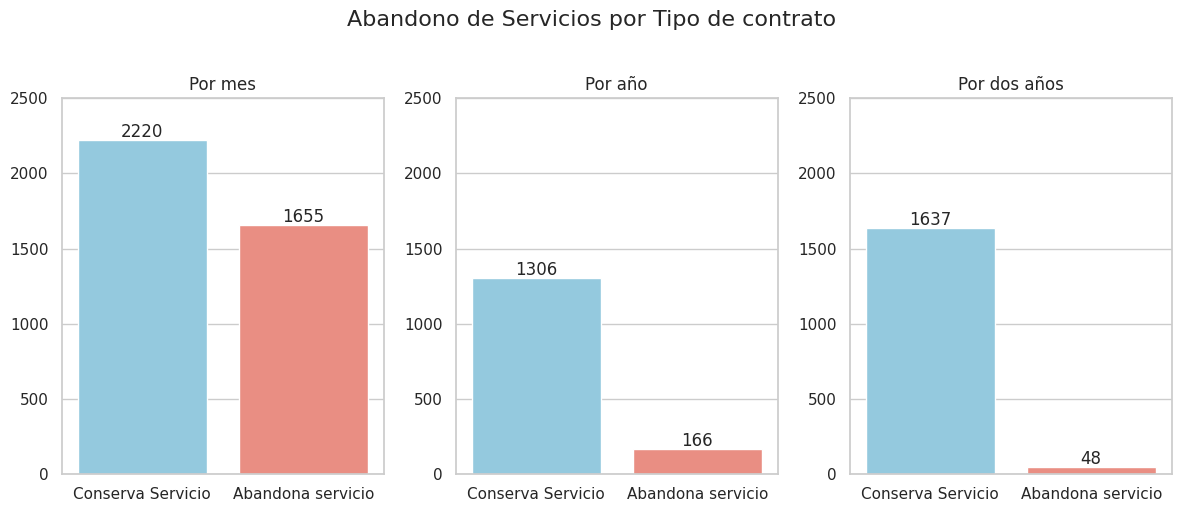

In [51]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
plt.suptitle('Abandono de Servicios por Tipo de contrato', fontsize=16, y=1.02)

def plot_abandono(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["skyblue", "salmon"],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Conserva Servicio', 'Abandona servicio'])
    ax.set_ylim(0, 2500)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_abandono(mes, axs[0], 'Por mes')
plot_abandono(agno, axs[1], 'Por año')
plot_abandono(agnos_2, axs[2], 'Por dos años')

plt.tight_layout()
plt.show()

## 4.3. ABANDONO DE SERVICIOS POR MÉTODO DE PAGO

In [53]:
df_telecomx['metodo_pago'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [58]:
cheque = df_telecomx[df_telecomx['metodo_pago'] == 'Mailed check']['abandono_servicio'].value_counts()
cheque_electronico = df_telecomx[df_telecomx['metodo_pago'] == 'Electronic check']['abandono_servicio'].value_counts()
credito = df_telecomx[df_telecomx['metodo_pago'] == 'Credit card (automatic)']['abandono_servicio'].value_counts()
transferencia = df_telecomx[df_telecomx['metodo_pago'] == 'Bank transfer (automatic)']['abandono_servicio'].value_counts()

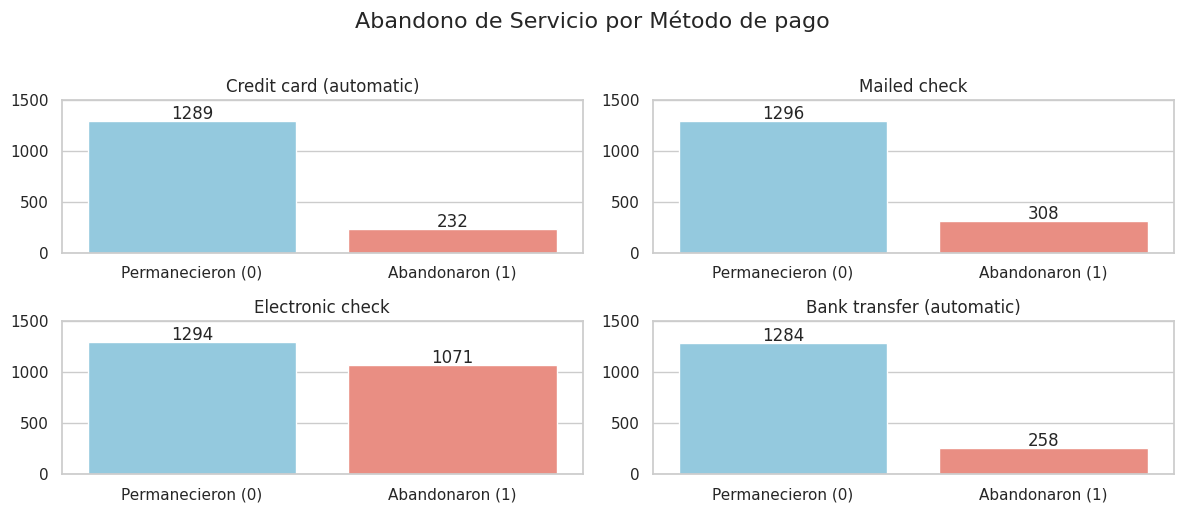

In [59]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 5))
plt.suptitle('Abandono de Servicio por Método de pago', fontsize=16, y=1.02)

def plot_abandono(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["skyblue", "salmon"],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Conserva Servicio', 'Abandona servicio'])
    ax.set_ylim(0, 1500)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_abandono(cheque, axs[0][1], 'Mailed check')
plot_abandono(cheque_electronico, axs[1][0], 'Electronic check')
plot_abandono(credito, axs[0][0], 'Credit card (automatic)')
plot_abandono(transferencia, axs[1][1], 'Bank transfer (automatic)')


plt.tight_layout()
plt.show()

## 4.4. ABANDONO DE SERVICIOS POR EDAD

In [60]:
no_senior = df_telecomx[df_telecomx['ciudadano_senior'] == 0]['abandono_servicio'].value_counts()
senior = df_telecomx[df_telecomx['ciudadano_senior'] == 1]['abandono_servicio'].value_counts()

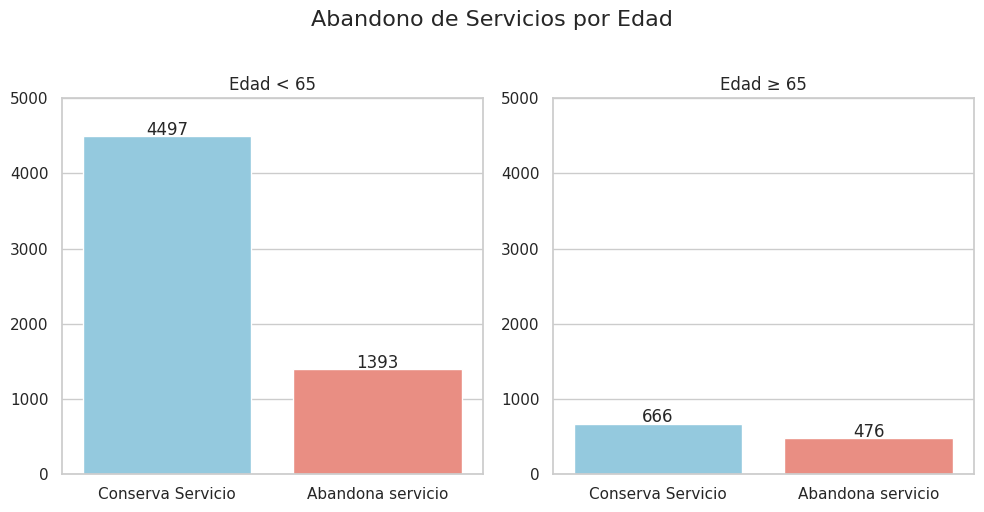

In [61]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Abandono de Servicios por Edad', fontsize=16, y=1.02)

def plot_abandono(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["skyblue", "salmon"],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Conserva Servicio', 'Abandona servicio'])
    ax.set_ylim(0, 5000)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_abandono(no_senior, axs[0], 'Edad < 65')
plot_abandono(senior, axs[1], 'Edad ≥ 65')

plt.tight_layout()
plt.show()

# 5. RECUENTO DE EVASIÓN POR VARIABLES NUMÉRICAS

In [63]:
total_gastado_1 = df_telecomx[df_telecomx['abandono_servicio'] == 1]['cargos_totales']
total_gastado_0 = df_telecomx[df_telecomx['abandono_servicio'] == 0]['cargos_totales']
tiempo_de_contrato_0 = df_telecomx[df_telecomx['abandono_servicio'] == 0]['meses_en_empresa']
tiempo_de_contrato_1 = df_telecomx[df_telecomx['abandono_servicio'] == 1]['meses_en_empresa']

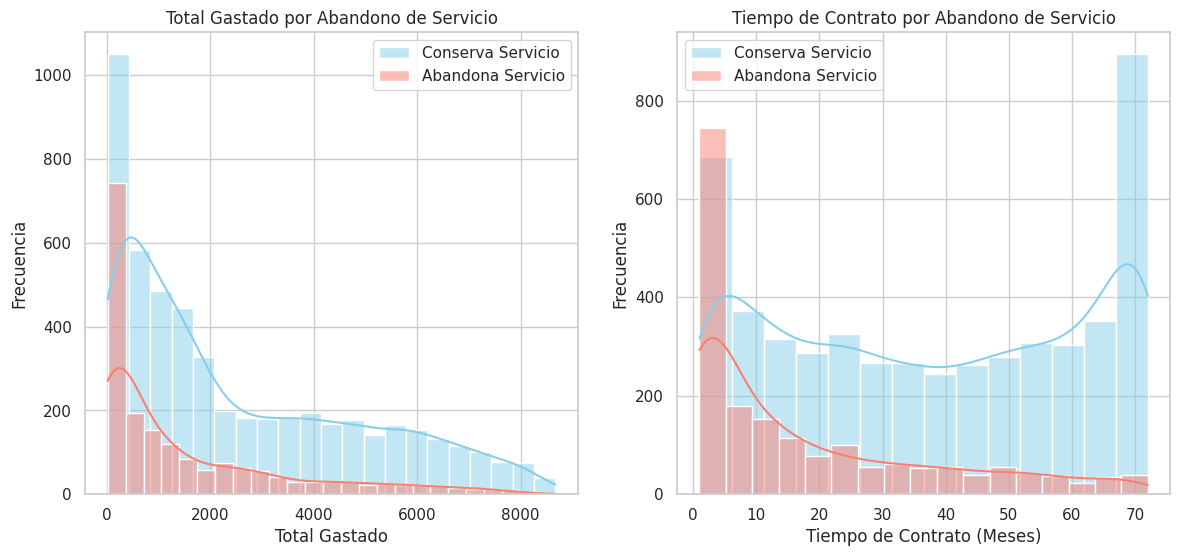

In [64]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(total_gastado_0, color='skyblue', label='Conserva Servicio', kde=True)
sns.histplot(total_gastado_1, color='salmon', label='Abandona Servicio', kde=True)
plt.title('Total Gastado por Abandono de Servicio')
plt.xlabel('Total Gastado')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(tiempo_de_contrato_0, color='skyblue', label='Conserva Servicio', kde=True)
sns.histplot(tiempo_de_contrato_1, color='salmon', label='Abandona Servicio', kde=True)
plt.title('Tiempo de Contrato por Abandono de Servicio')
plt.xlabel('Tiempo de Contrato (Meses)')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

#📄Informe final

# INTRODUCCIÓN

La empresa Telecom X, dedicada a ofrecer servicios de telecomunicaciones, se encuentra actualmente enfrentando un desafío crítico: un alto índice de evasión de clientes. Esta situación representa una amenaza directa a su crecimiento sostenido, rentabilidad y posicionamiento en un mercado altamente competitivo. Sin embargo, hasta el momento, no se han identificado con claridad las causas que impulsan esta fuga de clientes.

Como analista de datos contratado por la compañía, mi objetivo principal en este proyecto es llevar a cabo un análisis exploratorio exhaustivo de la información proporcionada. Este análisis comienza con la limpieza, tratamiento y estructuración de los datos disponibles, los cuales contienen múltiples variables asociadas a los servicios, comportamiento y perfil de los clientes.

Una vez depurados y organizados, los datos serán usados en modelos predictivos que permitan identificar patrones, tendencias y factores determinantes del abandono de servicios por parte de los clientes. Este proceso no solo permitirá conocer mejor a los clientes que están abandonando la empresa, sino también anticipar futuras bajas y diseñar estrategias efectivas de retención.

Con este estudio, Telecom X busca transformar los datos en decisiones estratégicas que reduzcan la evasión, fortalezcan la lealtad del cliente y mejoren la eficiencia operativa de la organización.

# LIMPIEZA Y TRATAMIENTO DE DATOS

En este proyecto, se trabajó con datos en formato JSON, que contenían información sobre clientes de la empresa Telecom X. A continuación, se describen los principales pasos realizados para importar, limpiar y procesar dichos datos:

1. Importación de los datos

* Se utilizó la biblioteca json para cargar los datos desde un archivo .json.
* También se empleó pandas para convertir los datos en un DataFrame, lo que
  permitió una manipulación más eficiente.

2. Exploración inicial

* Se revisó la estructura general del DataFrame.
* Se identificaron valores nulos, tipos de datos incorrectos y duplicadOs.

3. Tratamiento de datos anidados o categóricos

* Se desanidaron listas o diccionarios dentro del JSON en columnas independientes.

4. Limpieza de datos

* Eliminación de columnas innecesarias (por ejemplo, identificadores
  irrelevantes o campos vacíos).
* Conversión de tipos de datos.
* Tratamiento de valores nulos, se eliminaron registros incompletos.
* Normalización de texto: se estandarizaron campos como género, estado de
  servicio, y respuestas tipo "Yes/No".

5. Verificación final

* Se comprobó la consistencia del DataFrame después de la limpieza.
* Se exportó el DataFrame limpio para su uso posterior en el análisis  
  exploratorio o en modelos predictivos.

6. Creación de Nuevas Variables

* Se generó una nueva columna denominada cuentas_diarias. cuyo calcula
  corresponde a la división entre la columna de cargos_mensuales, el promedio de días en un mes. Esta valor busca ofrecer una perspectiva del gasto diario del cliente.

# ANÁLISIS EXPLORATORIO DE DATOS